# Run  dem_2_streams and stream_parameters

#### This notebook builds the stream network, runs CRT and creates SFR input variables. This script uses the file model_points.shp.

In [1]:
%matplotlib inline
import sys, os
import matplotlib.pyplot as plt
import arcpy
import geopandas
import matplotlib.image as mpimg
import ConfigParser
from matplotlib import cm
from arcpy import env
python_exe = sys.executable

In [2]:
# Set folder locations
arc_gsflow_folder=r"..\scripts"
config_file_folder=r"..\examples\sagehen"

#### GsflowArcpy uses a configuration file to set variables required by the scripts. Below the configuration file template is read, and default values are changed and written to the configuration file (".INI") read by GsflowArcpy.

In [3]:
# Load GsflowArcpy configuration file
Config = ConfigParser.ConfigParser()
Config.read("..\examples\sagehen\sagehen_parameters_orig.ini")

['..\\examples\\sagehen\\sagehen_parameters_orig.ini']

#### Values set below define the resolution of the stream network.

In [4]:
# Set problem specific variable values for scripts
# Cells with flow accumulations >= threshold will be designated as stream cells
flow_acc_threshold = 300
# All 1st order streams with a length below threshold will be removed
flow_length_threshold = 3
calc_flow_dir_points_flag = True
crt_exe_path = r"..\..\..\bin\CRT_1.3.1.exe"
crt_hruflg = 0
crt_flowflg = 3
crt_dpit = 0.01
crt_outitmax = 100000

In [5]:
# Write out modified values to configuration file
cfgfile = open("..\examples\sagehen\sagehen_parameters.ini",'w')
Config.set('INPUTS','flow_acc_threshold',flow_acc_threshold)
Config.set('INPUTS','flow_length_threshold',flow_length_threshold)
Config.set('INPUTS','calc_flow_dir_points_flag',calc_flow_dir_points_flag)
Config.set('INPUTS','crt_exe_path',crt_exe_path)
Config.set('INPUTS','crt_hruflg',crt_hruflg)
Config.set('INPUTS','crt_flowflg',crt_flowflg)
Config.set('INPUTS','crt_dpit',crt_dpit)
Config.set('INPUTS','crt_outitmax',crt_outitmax)
Config.write(cfgfile)
cfgfile.close()

#### Run the GsflowArcpy script dem_2_streams script.

In [6]:
# Set and run dem_2_streams script
script = r"dem_2_streams.py"
argument = r" -i ..\examples\sagehen\sagehen_parameters.ini"
cmd=python_exe + " " + os.path.join(arc_gsflow_folder,script)
cmd = cmd + argument
os.system(cmd)

0

#### The dem_2_streams script generates the linework for the stream network. The USGS National Hydrography dataset is used as a guide to set a desired stream network resolution for a GSFLOW model; however, the NHD network is not used explicitly to define the stream network. 

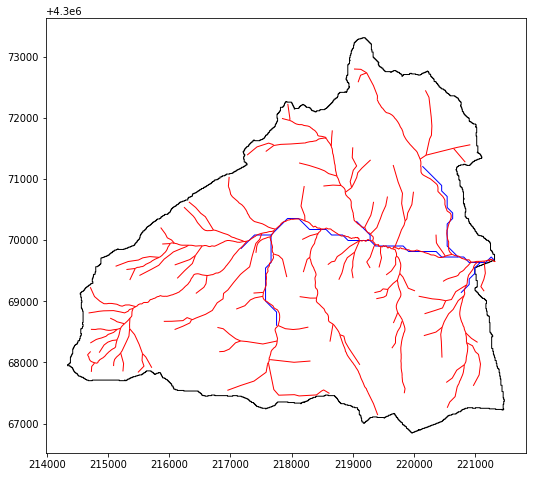

In [10]:
fig, ax = plt.subplots(figsize=(20,8))
ax.set_aspect('equal')
fn1=r"..\examples\sagehen\shapefiles\watershed_proj.shp"
fn2=r"..\examples\sagehen\hru_params\flow_rasters\streams.shp"
fn3=r"..\examples\sagehen\nhd\NHDFlowline_proj.shp"
boundary=geopandas.read_file(fn1)
streams=geopandas.read_file(fn2)
nhd=geopandas.read_file(fn3)
streams.plot(ax=ax,color='none', edgecolor='blue', linewidth=1.0)
boundary.plot(ax=ax,color='none', edgecolor='black', linewidth=1.0)
nhd.plot(ax=ax,color='none', edgecolor='red', linewidth=1.0)
plt.show()

#### After the stream network has been created, stream_parameters is run to develop cascade parameters and SFR variables.

In [8]:
# Set and run stream_parameters script
script = r"stream_parameters.py"
argument = r" -i ..\examples\sagehen\sagehen_parameters.ini"
cmd=python_exe + " " + os.path.join(arc_gsflow_folder,script)
cmd = cmd + argument
os.system(cmd)

0

## Class Exersize:
#### How does the stream network generated above (blue lines) compare to the NHD network (red lines)? What values of flow_acc_threshold and flow_length_threshold provide a reasonable resolution of the network?